# H2 Lyman-Werner Bands (with ``linetools``)

In [1]:
%matplotlib inline

In [1]:
# imports
from linetools.analysis.voigt import voigt_from_abslines
from linetools.isgm import abscomponent as lt_abscomp
from linetools.spectralline import AbsLine
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.lists.linelist import LineList
from linetools.isgm.abscomponent import AbsComponent
from astropy import units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord
import numpy as np
import pdb
import linetools.analysis.voigt as lav

## New feature: wildcard selection for H2 lines

In [2]:
h2 = LineList('H2')

# Pick one vibrational band (old-style)
h2.all_transitions('B19-0P(0)').pprint_all()

# Pick one vibrational band (wildcard)
h2.all_transitions('B19-0P(*)').pprint_all()

# Pick all transitions from the state (X,v=0,j=0) (wildcard)
h2.all_transitions('*-0?(0)').pprint_all()

  A    el  nj  nk group    name     Ek       f        wrest      Ref    mol   Ej    Am ion   Ex    Jj  Jk  Z   gk  gj    gamma     Id
1 / s                             1 / cm             Angstrom               1 / cm         1 / cm                        1 / s       
----- --- --- --- ----- --------- ------ ---------- --------- --------- --- ------ --- --- ------ --- --- --- --- --- ----------- ---
   --   2  19   0     8 B19-0P(1)     -- 1.3150e-03  911.9670 Abgrall93  H2     --  --  --     -- 0.0 1.0  --   9  -- 743800000.0   0
   --   2  19   0     8 B19-0P(2)     -- 1.6130e-03  913.7690 Abgrall93  H2     --  --  --     -- 1.0 2.0  --   5  -- 744500000.0   5
   --   2  19   0     8 B19-0P(3)     -- 1.8240e-03  916.3820 Abgrall93  H2     --  --  --     -- 2.0 3.0  --  21  -- 748900000.0  12
   --   2  19   0     8 B19-0P(4)     -- 2.1330e-03  919.7890 Abgrall93  H2     --  --  --     -- 3.0 4.0  --   9  -- 758600000.0  25
   --   2  19   0     8 B19-0P(5)     -- 2.8650e-03  923.9620 

## H2 single line: B3-0R(0)

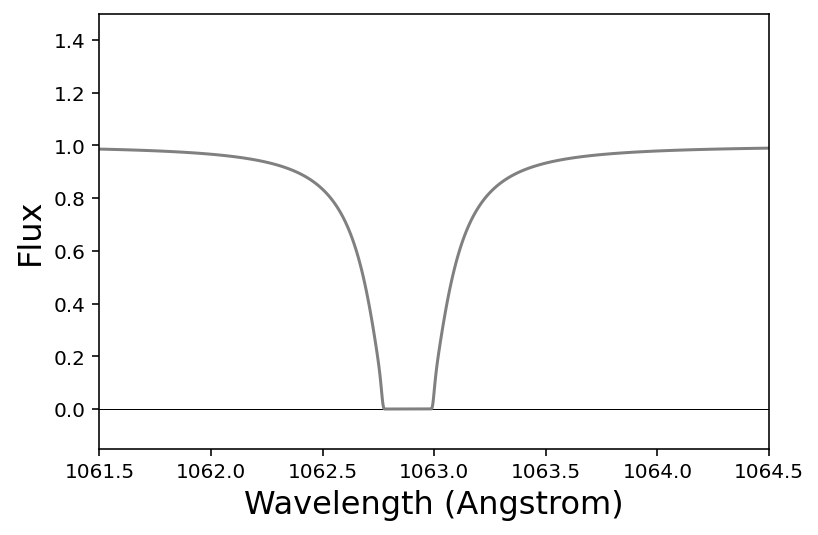

In [4]:
h2_B3_0R0 = AbsLine('B3-0R(0)', linelist=h2)

# Setup the line
h2_B3_0R0.attrib['N'] = 10**19./u.cm**2  # log N
h2_B3_0R0.attrib['b'] = 10.*u.km/u.s
h2_B3_0R0.setz(0.)
wv_array = np.arange(1060,1100, 0.00001) * u.AA
vmodel2 = voigt_from_abslines(wv_array, h2_B3_0R0, fwhm=3.)
vmodel2.plot(xlim=[1061.5,1064.5])

## H2(v=0) bands (up to J=6) + HI Lyman series

read_sets: Using set file -- 
  /Users/Rui/Resilio/Workspace/projects/linetools/linetools/lists/sets/llist_v1.3.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


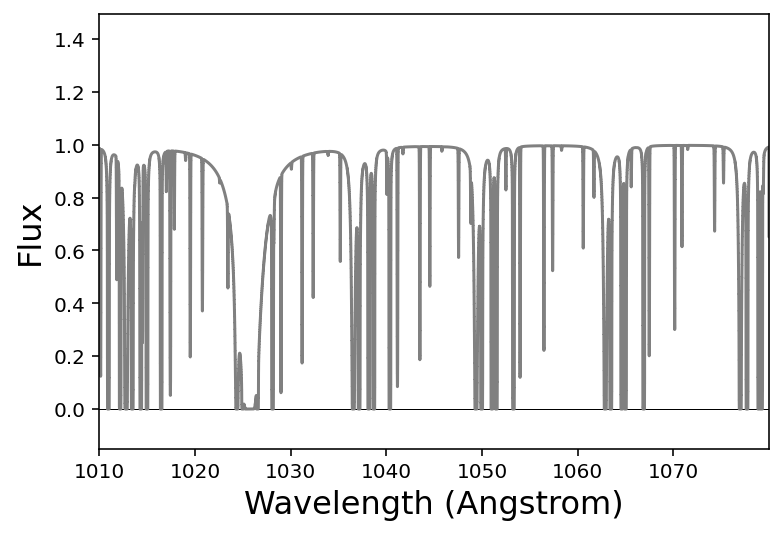

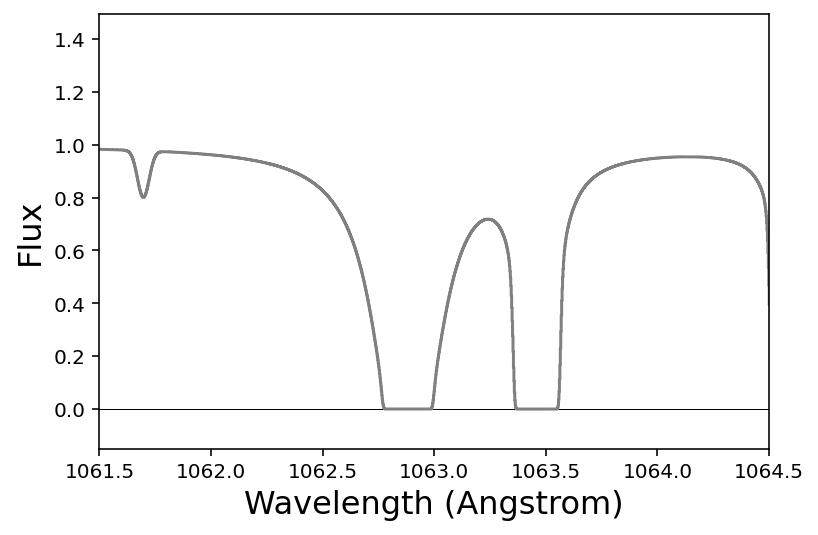

In [3]:
coord = SkyCoord(0,0, unit='deg')
z = 0.0
vlim = [-200., 200.] * u.km/u.s
comps=[]

# add all lines from H2(v=0),J=0,1..6

NJ=[19.0,18.5,18.2,15.0,14.5,14.0,13.0]
for J in range(7):
    comp = AbsComponent(coord,(-1, -1), z, vlim)
    comp.add_abslines_from_linelist(llist='H2', init_name="*-0?("+str(J)+")", wvlim=[1000, 1090]*u.AA)
    for absline in comp._abslines:
        absline.attrib['b']=10*u.km/u.s
        absline.attrib['N']=(10**NJ[J])/u.cm**2
    comps.append(comp)

# add HI Lyman series

NHI=21.0    
comp = AbsComponent(coord,(1, 1), z, vlim)
comp.add_abslines_from_linelist(llist='HI',wvlim=[1000, 1080]*u.AA)
for absline in comp._abslines:
    absline.attrib['b']=15*u.km/u.s
    absline.attrib['N']=(10**NHI)/u.cm**2
comps.append(comp)

wv_array = np.arange(1010,1080, 0.002) * u.AA  # This should match your spectrum wavelength array 
model_1 = lav.voigt_from_components(wv_array, comps,fwhm=3.)

model_1.plot()
model_1.plot(xlim=[1061.5,1064.5])